In [ ]:
Assignment 3: Pneumonia Detection from X-Ray Images 
Dataset: Chest X-Ray Images (5,863 images of normal and pneumonia cases) 
Task: 
Build a CNN model to detect pneumonia from chest X-rays. 
Use Conv2D, MaxPooling, and Dropout layers. 
Train the model on the dataset and evaluate performance. 
 Expected Outcomes: 
Achieve 85%+ accuracy on pneumonia detection. 
 Display ROC curve, precision, and recall. 

In [1]:
import tensorflow as tf
import cv2

In [2]:
train_path=r"C:\Users\SASWATA\Downloads\archive (4)\chest_xray\train"
valid_path=r"C:\Users\SASWATA\Downloads\archive (4)\chest_xray\val"
test_path=r"C:\Users\SASWATA\Downloads\archive (4)\chest_xray\test"

In [3]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(128,128),
    batch_size=32,
    label_mode='categorical'   
)

Found 5216 files belonging to 2 classes.


In [4]:
valid_dataset=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    image_size=(128,128),
    batch_size=32,
    label_mode='categorical'   
)

Found 16 files belonging to 2 classes.


In [5]:
test_dataset=tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(128,128),
    batch_size=32,
    label_mode='categorical'   
)

Found 624 files belonging to 2 classes.


In [6]:
train_unbatched = train_dataset.unbatch()
valid_unbatched = valid_dataset.unbatch()
test_unbatched = test_dataset.unbatch()

In [7]:
full_dataset = train_unbatched.concatenate(valid_unbatched).concatenate(test_unbatched)

In [8]:
total_size = 5216 + 16 + 624  # Total number of images: 5,856
shuffled_dataset = full_dataset.shuffle(buffer_size=total_size)

In [9]:
train_size = int(0.75 * total_size)  # 4,392 samples (75%)
valid_size = int(0.15 * total_size)  # 878 samples (15%)
test_size = total_size - train_size - valid_size  # 586 samples (10%)

In [10]:
train_dataset = shuffled_dataset.take(train_size)
remaining_dataset = shuffled_dataset.skip(train_size)
valid_dataset = remaining_dataset.take(valid_size)
test_dataset = remaining_dataset.skip(valid_size)

In [11]:
length = shuffled_dataset.reduce(0, lambda count, _: count + 1).numpy()
print("Total examples:", length)

Total examples: 5856


In [12]:
length = train_dataset.reduce(0, lambda count, _: count + 1).numpy()
print("Total train examples:", length)

Total train examples: 4392


In [13]:
length = valid_dataset.reduce(0, lambda count, _: count + 1).numpy()
print("Total validation examples:", length)


Total validation examples: 878


In [14]:
length = test_dataset.reduce(0, lambda count, _: count + 1).numpy()
print("Total test examples:", length)


Total test examples: 586


In [15]:
train_dataset = train_dataset.batch(16)
valid_dataset = valid_dataset.batch(16)
test_dataset = test_dataset.batch(16)

In [17]:
model=tf.keras.Sequential(
    [
        tf.keras.Input(shape=(256,256,3)),
        tf.keras.layers.Rescaling(1.0/255.0),
        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128,3,activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(256,3,activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(512,3,activation='relu'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(2,activation='softmax')
    ]
)

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 256)      

In [20]:
history=model.fit(train_dataset,epochs=50,validation_data=valid_dataset,verbose=2)

Epoch 1/50
275/275 - 31s - loss: 0.5301 - accuracy: 0.7509 - val_loss: 0.3214 - val_accuracy: 0.8656 - 31s/epoch - 112ms/step
Epoch 2/50
275/275 - 25s - loss: 0.3066 - accuracy: 0.8789 - val_loss: 0.3054 - val_accuracy: 0.8713 - 25s/epoch - 90ms/step
Epoch 3/50
275/275 - 25s - loss: 0.2725 - accuracy: 0.8896 - val_loss: 0.2522 - val_accuracy: 0.8941 - 25s/epoch - 90ms/step
Epoch 4/50
275/275 - 25s - loss: 0.2553 - accuracy: 0.8955 - val_loss: 0.2437 - val_accuracy: 0.8941 - 25s/epoch - 90ms/step
Epoch 5/50
275/275 - 25s - loss: 0.2400 - accuracy: 0.9051 - val_loss: 0.2539 - val_accuracy: 0.8986 - 25s/epoch - 90ms/step
Epoch 6/50
275/275 - 25s - loss: 0.2176 - accuracy: 0.9153 - val_loss: 0.2107 - val_accuracy: 0.9123 - 25s/epoch - 90ms/step
Epoch 7/50
275/275 - 25s - loss: 0.2150 - accuracy: 0.9139 - val_loss: 0.2071 - val_accuracy: 0.9146 - 25s/epoch - 90ms/step
Epoch 8/50
275/275 - 25s - loss: 0.2072 - accuracy: 0.9180 - val_loss: 0.1986 - val_accuracy: 0.9248 - 25s/epoch - 90ms/step

In [21]:
model.evaluate(test_dataset)

37/37 [==============================] - 6s 35ms/step - loss: 0.0090 - accuracy: 0.9966


[0.009022774174809456, 0.9965870380401611]

In [22]:
import matplotlib.pyplot as plt

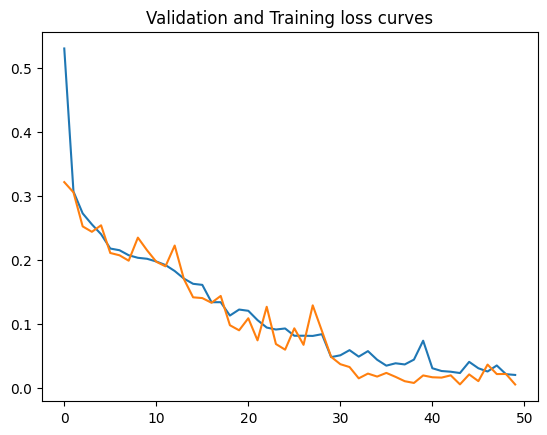

In [23]:
plt.title('Validation and Training loss curves')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

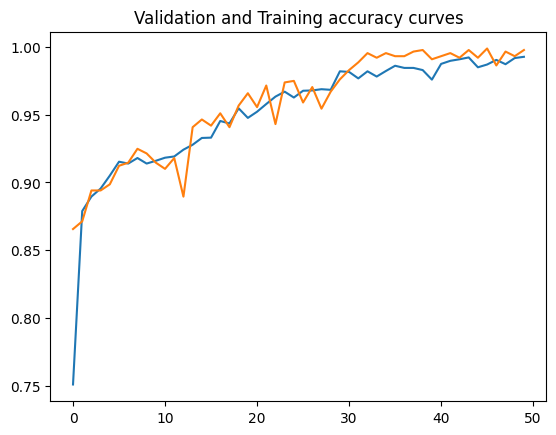

In [24]:
plt.title('Validation and Training accuracy curves')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()